<a href="https://colab.research.google.com/github/pachterlab/monod/blob/nn-integration/nn_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b nn-integration https://github.com/pachterlab/monod.git

Cloning into 'monod'...
remote: Enumerating objects: 398, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 398 (delta 28), reused 42 (delta 18), pack-reused 343
Receiving objects: 100% (398/398), 442.83 KiB | 1.99 MiB/s, done.
Resolving deltas: 100% (214/214), done.


In [2]:
import sys
sys.path.insert(0, '/content/monod/src')

In [3]:
import monod
from monod import cme_toolbox

In [26]:
# monod?

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
b = 10
beta = 1
gamma = 0.8
p = np.log10(np.asarray([b,beta,gamma]))

In [10]:
limits = [20,25]

In [49]:
model_baseline = monod.cme_toolbox.CMEModel('Bursty','None')

In [13]:
Pss = model_baseline.eval_model_pss(p,limits)

Text(0, 0.5, 'Mature')

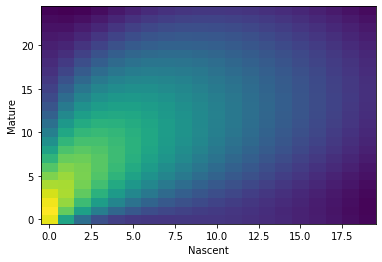

In [17]:
plt.imshow(np.log10(Pss).T,aspect='auto')
plt.gca().invert_yaxis()
plt.xlabel('Nascent')
plt.ylabel('Mature')

In [32]:
n_cells = 1000
X, Y = np.meshgrid(np.arange(limits[0]), np.arange(limits[1]), indexing="ij")
X = X.flatten()
Y = Y.flatten()
x = np.random.choice(np.arange(len(X)), p=Pss.flatten(), size=n_cells, replace=True)
raw_counts = np.zeros((2,n_cells),dtype=int)
raw_counts[0] = X[x]
raw_counts[1] = Y[x]


In [34]:
raw_counts

array([[ 5, 14,  6, ...,  3,  1,  4],
       [11,  3, 14, ..., 20,  6, 22]])

In [35]:
unique, unique_counts = np.unique(
    np.vstack(raw_counts).T, axis=0, return_counts=True
)
frequencies = unique_counts / n_cells
unique = unique.astype(int)
data = (unique, frequencies)


In [38]:
model_baseline.eval_model_kld(p, limits, "None", data)

0.2686942387451714

Text(0, 0.5, 'KLD')

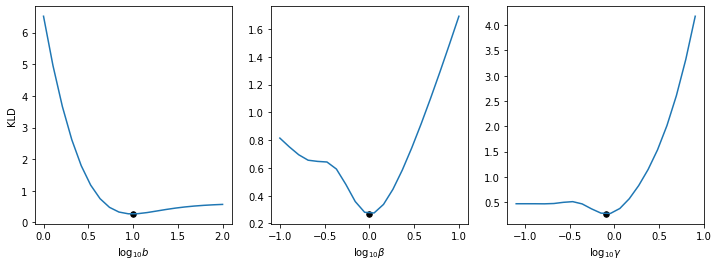

In [47]:
fig1,ax1=plt.subplots(1,3,figsize=(12,4))
param_names = model_baseline.get_log_name_str()
for k in range(3):
    # for 
    domain = p[k] + np.linspace(-1,1,20)
    kld = []
    for d in domain:
        p_ = np.copy(p)
        p_[k] = d
        kld_ = model_baseline.eval_model_kld(p_, limits, "None", data)
        kld.append(kld_)
    ax1[k].plot(domain,kld)
    kld_ = model_baseline.eval_model_kld(p, limits, "None", data)
    ax1[k].scatter(p[k],kld_,30,'k')
    ax1[k].set_xlabel(param_names[k])
ax1[0].set_ylabel('KLD')

In [50]:
model_nn = monod.cme_toolbox.CMEModel('Bursty','None',quad_method='nn')

In [53]:
Pss = model_nn.eval_model_pss(p,limits)

ValueError: ignored

In [55]:
model_nn.eval_model_kld(p, limits, "None", data)

ValueError: ignored